In [1]:
# import data science libraries
import numpy as np
import pandas as pd

import re

import os.path

from os import path

from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.cluster import KMeans

import wrangle as wr
import preprocessing_permits as pr
import explore as ex
import model as mo

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rc("figure", figsize=(16, 8))
sns.set_palette("colorblind")

In [3]:
# call get_permits_model_df
df = pr.get_permits_model_df()

# feature engineering
df = pr.add_new_features(df)

# filter top cities
df = pr.filter_top_cities_building_permits(df)

# bring clusters
df, kmeans, centroids, scaler, scaled_ei_threshold_value, X = pr.create_clusters(df)

In [4]:
df

,city,state,year,total_high_density_bldgs,total_high_density_units,total_high_density_value,avg_units_per_bldg,value_per_bldg,value_per_unit,city_state_high_density_bldgs_delta_pct,city_state_high_density_units_delta_pct,city_state_high_density_value_delta_pct,market_volume,market_volume_delta_pct,ei,city_state,cluster
1,Albany,NY,1998,47.0,1038.0,54232000.0,0.499727,1.153872e+06,52246.628131,0.566667,1.442353,2.034637,2.529787e+10,0.231085,1.200626,Albany_NY,1
2,Albany,NY,1999,39.0,515.0,24484000.0,-0.493115,6.277949e+05,47541.747573,-0.170213,-0.503854,-0.548532,2.609590e+10,0.031545,-1.118050,Albany_NY,0
3,Albany,NY,2000,25.0,346.0,16130000.0,-0.398138,6.452000e+05,46618.497110,-0.358974,-0.328155,-0.341202,2.742204e+10,0.050818,-0.655825,Albany_NY,0
4,Albany,NY,2001,56.0,502.0,24536000.0,-1.307457,4.381429e+05,48876.494024,1.240000,0.450867,0.521141,2.913103e+10,0.062322,0.503915,Albany_NY,5
5,Albany,NY,2002,47.0,475.0,29634000.0,-1.049695,6.305106e+05,62387.368421,-0.160714,-0.053785,0.207776,3.169504e+10,0.088016,0.146820,Albany_NY,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,York,PA,2015,3.0,53.0,3185000.0,0.081753,1.061667e+06,60094.339623,-0.666667,-0.320513,-0.449724,5.200240e+10,0.313639,-1.170629,York_PA,0
2986,York,PA,2016,3.0,34.0,1566000.0,-0.808043,5.220000e+05,46058.823529,0.000000,-0.358491,-0.508320,4.928300e+10,-0.052294,-0.905714,York_PA,0
2987,York,PA,2017,15.0,83.0,10204000.0,-2.387242,6.802667e+05,122939.759036,4.000000,1.441176,5.515964,5.158824e+10,0.046775,2.050569,York_PA,5
2988,York,PA,2018,2.0,26.0,2160000.0,-0.524968,1.080000e+06,83076.923077,-0.866667,-0.686747,-0.788318,5.336251e+10,0.034393,-1.887526,York_PA,4


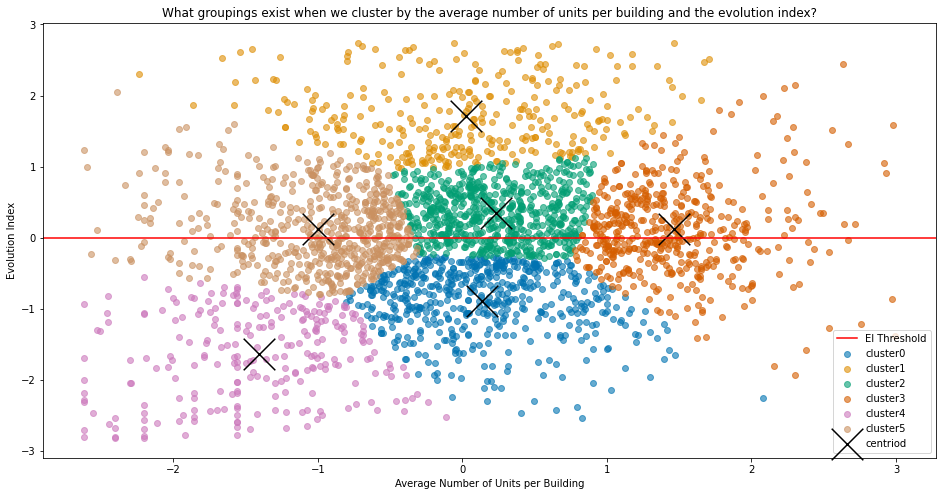

In [5]:
ex.visualize_clusters(df, centroids, scaled_ei_threshold_value)

In [6]:
print(f"cluster 0 greater U.S. market growth rate = {df[df.cluster == 0].market_volume_delta_pct.mean() * 100:.2f}%")
print(f"cluster 1 greater U.S. market growth rate = {df[df.cluster == 1].market_volume_delta_pct.mean() * 100:.2f}%")
print(f"cluster 2 greater U.S. market growth rate = {df[df.cluster == 2].market_volume_delta_pct.mean() * 100:.2f}%")
print(f"cluster 3 greater U.S. market growth rate = {df[df.cluster == 3].market_volume_delta_pct.mean() * 100:.2f}%")
print(f"cluster 4 greater U.S. market growth rate = {df[df.cluster == 4].market_volume_delta_pct.mean() * 100:.2f}%")
print(f"cluster 5 greater U.S. market growth rate = {df[df.cluster == 5].market_volume_delta_pct.mean() * 100:.2f}%")
print(f"cluster 6 greater U.S. market growth rate = {df[df.cluster == 0].market_volume_delta_pct.mean() * 100:.2f}%")
print(f"          greater U.S. market growth rate = {df.market_volume_delta_pct.mean() * 100:.2f}%")

cluster 0 greater U.S. market growth rate = 11.50%
cluster 1 greater U.S. market growth rate = 3.90%
cluster 2 greater U.S. market growth rate = 7.99%
cluster 3 greater U.S. market growth rate = 11.72%
cluster 4 greater U.S. market growth rate = 7.97%
cluster 5 greater U.S. market growth rate = 5.99%
cluster 6 greater U.S. market growth rate = 11.50%
          greater U.S. market growth rate = 8.43%


In [7]:
df["test_future_cluster"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["cluster"]]
                                  .shift(-2))

In [8]:
df

,city,state,year,total_high_density_bldgs,total_high_density_units,total_high_density_value,avg_units_per_bldg,value_per_bldg,value_per_unit,city_state_high_density_bldgs_delta_pct,city_state_high_density_units_delta_pct,city_state_high_density_value_delta_pct,market_volume,market_volume_delta_pct,ei,city_state,cluster,test_future_cluster
1,Albany,NY,1998,47.0,1038.0,54232000.0,0.499727,1.153872e+06,52246.628131,0.566667,1.442353,2.034637,2.529787e+10,0.231085,1.200626,Albany_NY,1,0.0
2,Albany,NY,1999,39.0,515.0,24484000.0,-0.493115,6.277949e+05,47541.747573,-0.170213,-0.503854,-0.548532,2.609590e+10,0.031545,-1.118050,Albany_NY,0,5.0
3,Albany,NY,2000,25.0,346.0,16130000.0,-0.398138,6.452000e+05,46618.497110,-0.358974,-0.328155,-0.341202,2.742204e+10,0.050818,-0.655825,Albany_NY,0,5.0
4,Albany,NY,2001,56.0,502.0,24536000.0,-1.307457,4.381429e+05,48876.494024,1.240000,0.450867,0.521141,2.913103e+10,0.062322,0.503915,Albany_NY,5,5.0
5,Albany,NY,2002,47.0,475.0,29634000.0,-1.049695,6.305106e+05,62387.368421,-0.160714,-0.053785,0.207776,3.169504e+10,0.088016,0.146820,Albany_NY,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,York,PA,2015,3.0,53.0,3185000.0,0.081753,1.061667e+06,60094.339623,-0.666667,-0.320513,-0.449724,5.200240e+10,0.313639,-1.170629,York_PA,0,5.0
2986,York,PA,2016,3.0,34.0,1566000.0,-0.808043,5.220000e+05,46058.823529,0.000000,-0.358491,-0.508320,4.928300e+10,-0.052294,-0.905714,York_PA,0,4.0
2987,York,PA,2017,15.0,83.0,10204000.0,-2.387242,6.802667e+05,122939.759036,4.000000,1.441176,5.515964,5.158824e+10,0.046775,2.050569,York_PA,5,1.0
2988,York,PA,2018,2.0,26.0,2160000.0,-0.524968,1.080000e+06,83076.923077,-0.866667,-0.686747,-0.788318,5.336251e+10,0.034393,-1.887526,York_PA,4,NaN


In [9]:
predictions = df[(df.year == 2018) | (df.year == 2019)]
predictions

,city,state,year,total_high_density_bldgs,total_high_density_units,total_high_density_value,avg_units_per_bldg,value_per_bldg,value_per_unit,city_state_high_density_bldgs_delta_pct,city_state_high_density_units_delta_pct,city_state_high_density_value_delta_pct,market_volume,market_volume_delta_pct,ei,city_state,cluster,test_future_cluster
21,Albany,NY,2018,48.0,857.0,214816000.0,0.101973,4.475333e+06,250660.443407,-0.225806,-0.073514,1.227665,5.336251e+10,0.034393,1.038858,Albany_NY,1,NaN
22,Albany,NY,2019,48.0,665.0,60456000.0,-0.396078,1.259500e+06,90911.278195,0.000000,-0.224037,-0.718568,5.956964e+10,0.116320,-1.707468,Albany_NY,0,NaN
44,Albuquerque,NM,2018,13.0,75.0,3622000.0,-2.291558,2.786154e+05,48293.333333,-0.458333,-0.701195,-0.826125,5.336251e+10,0.034393,-2.036194,Albuquerque_NM,4,NaN
45,Albuquerque,NM,2019,14.0,262.0,23162000.0,0.191545,1.654429e+06,88404.580153,0.076923,2.493333,5.394809,5.956964e+10,0.116320,1.992965,Albuquerque_NM,1,NaN
67,Allentown,PA,2018,13.0,162.0,14664000.0,-0.611499,1.128000e+06,90518.518519,0.083333,0.025316,0.687651,5.336251e+10,0.034393,0.681371,Allentown_PA,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,Wilmington,NC,2019,64.0,1598.0,190328000.0,0.720916,2.973875e+06,119103.879850,3.000000,2.015094,1.443517,5.956964e+10,0.116320,1.058793,Wilmington_NC,2,NaN
2965,Worcester,MA,2018,13.0,364.0,45115000.0,0.921917,3.470385e+06,123942.307692,-0.133333,-0.143529,0.508157,5.336251e+10,0.034393,0.528769,Worcester_MA,3,NaN
2966,Worcester,MA,2019,18.0,622.0,74381000.0,1.277172,4.132278e+06,119583.601286,0.384615,0.708791,0.648698,5.956964e+10,0.116320,0.546425,Worcester_MA,3,NaN
2988,York,PA,2018,2.0,26.0,2160000.0,-0.524968,1.080000e+06,83076.923077,-0.866667,-0.686747,-0.788318,5.336251e+10,0.034393,-1.887526,York_PA,4,NaN


In [10]:
total_units = pd.DataFrame(predictions.groupby(["city", "state"]).total_high_density_units.sum())

In [11]:
# total_units.rename(columns={"total_high_density_bldgs": "2018_2019_total_units"}, inplace=True)

In [12]:
total_units

,,total_high_density_units
city,state,
Albany,NY,1522.0
Albuquerque,NM,337.0
Allentown,PA,401.0
Anchorage,AK,433.0
Appleton,WI,177.0
...,...,...
Tuscaloosa,AL,1106.0
Washington,DC,25634.0
Wilmington,NC,2128.0


In [13]:
total_bldgs = pd.DataFrame(predictions.groupby(["city", "state"]).total_high_density_bldgs.sum())

In [14]:
# total_bldgs.rename(columns=[{"total_high_density_bldgs": "2018_2019_total_bldgs"}], inplace=True)

In [15]:
total_bldgs

,,total_high_density_bldgs
city,state,
Albany,NY,96.0
Albuquerque,NM,27.0
Allentown,PA,30.0
Anchorage,AK,42.0
Appleton,WI,13.0
...,...,...
Tuscaloosa,AL,37.0
Washington,DC,384.0
Wilmington,NC,80.0


In [16]:
predictions

,city,state,year,total_high_density_bldgs,total_high_density_units,total_high_density_value,avg_units_per_bldg,value_per_bldg,value_per_unit,city_state_high_density_bldgs_delta_pct,city_state_high_density_units_delta_pct,city_state_high_density_value_delta_pct,market_volume,market_volume_delta_pct,ei,city_state,cluster,test_future_cluster
21,Albany,NY,2018,48.0,857.0,214816000.0,0.101973,4.475333e+06,250660.443407,-0.225806,-0.073514,1.227665,5.336251e+10,0.034393,1.038858,Albany_NY,1,NaN
22,Albany,NY,2019,48.0,665.0,60456000.0,-0.396078,1.259500e+06,90911.278195,0.000000,-0.224037,-0.718568,5.956964e+10,0.116320,-1.707468,Albany_NY,0,NaN
44,Albuquerque,NM,2018,13.0,75.0,3622000.0,-2.291558,2.786154e+05,48293.333333,-0.458333,-0.701195,-0.826125,5.336251e+10,0.034393,-2.036194,Albuquerque_NM,4,NaN
45,Albuquerque,NM,2019,14.0,262.0,23162000.0,0.191545,1.654429e+06,88404.580153,0.076923,2.493333,5.394809,5.956964e+10,0.116320,1.992965,Albuquerque_NM,1,NaN
67,Allentown,PA,2018,13.0,162.0,14664000.0,-0.611499,1.128000e+06,90518.518519,0.083333,0.025316,0.687651,5.336251e+10,0.034393,0.681371,Allentown_PA,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,Wilmington,NC,2019,64.0,1598.0,190328000.0,0.720916,2.973875e+06,119103.879850,3.000000,2.015094,1.443517,5.956964e+10,0.116320,1.058793,Wilmington_NC,2,NaN
2965,Worcester,MA,2018,13.0,364.0,45115000.0,0.921917,3.470385e+06,123942.307692,-0.133333,-0.143529,0.508157,5.336251e+10,0.034393,0.528769,Worcester_MA,3,NaN
2966,Worcester,MA,2019,18.0,622.0,74381000.0,1.277172,4.132278e+06,119583.601286,0.384615,0.708791,0.648698,5.956964e+10,0.116320,0.546425,Worcester_MA,3,NaN
2988,York,PA,2018,2.0,26.0,2160000.0,-0.524968,1.080000e+06,83076.923077,-0.866667,-0.686747,-0.788318,5.336251e+10,0.034393,-1.887526,York_PA,4,NaN


In [17]:
predictions = predictions.merge(total_units, how="left", on=["city", "state"], suffixes=("_og", "_1819"))

In [18]:
predictions

,city,state,year,total_high_density_bldgs,total_high_density_units_og,total_high_density_value,avg_units_per_bldg,value_per_bldg,value_per_unit,city_state_high_density_bldgs_delta_pct,city_state_high_density_units_delta_pct,city_state_high_density_value_delta_pct,market_volume,market_volume_delta_pct,ei,city_state,cluster,test_future_cluster,total_high_density_units_1819
0,Albany,NY,2018,48.0,857.0,214816000.0,0.101973,4.475333e+06,250660.443407,-0.225806,-0.073514,1.227665,5.336251e+10,0.034393,1.038858,Albany_NY,1,NaN,1522.0
1,Albany,NY,2019,48.0,665.0,60456000.0,-0.396078,1.259500e+06,90911.278195,0.000000,-0.224037,-0.718568,5.956964e+10,0.116320,-1.707468,Albany_NY,0,NaN,1522.0
2,Albuquerque,NM,2018,13.0,75.0,3622000.0,-2.291558,2.786154e+05,48293.333333,-0.458333,-0.701195,-0.826125,5.336251e+10,0.034393,-2.036194,Albuquerque_NM,4,NaN,337.0
3,Albuquerque,NM,2019,14.0,262.0,23162000.0,0.191545,1.654429e+06,88404.580153,0.076923,2.493333,5.394809,5.956964e+10,0.116320,1.992965,Albuquerque_NM,1,NaN,337.0
4,Allentown,PA,2018,13.0,162.0,14664000.0,-0.611499,1.128000e+06,90518.518519,0.083333,0.025316,0.687651,5.336251e+10,0.034393,0.681371,Allentown_PA,5,NaN,401.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Wilmington,NC,2019,64.0,1598.0,190328000.0,0.720916,2.973875e+06,119103.879850,3.000000,2.015094,1.443517,5.956964e+10,0.116320,1.058793,Wilmington_NC,2,NaN,2128.0
256,Worcester,MA,2018,13.0,364.0,45115000.0,0.921917,3.470385e+06,123942.307692,-0.133333,-0.143529,0.508157,5.336251e+10,0.034393,0.528769,Worcester_MA,3,NaN,986.0
257,Worcester,MA,2019,18.0,622.0,74381000.0,1.277172,4.132278e+06,119583.601286,0.384615,0.708791,0.648698,5.956964e+10,0.116320,0.546425,Worcester_MA,3,NaN,986.0
258,York,PA,2018,2.0,26.0,2160000.0,-0.524968,1.080000e+06,83076.923077,-0.866667,-0.686747,-0.788318,5.336251e+10,0.034393,-1.887526,York_PA,4,NaN,415.0


In [19]:
predictions = predictions.merge(total_bldgs, how="left", on=["city", "state"], suffixes=("_og", "_1819"))

In [20]:
predictions

,city,state,year,total_high_density_bldgs_og,total_high_density_units_og,total_high_density_value,avg_units_per_bldg,value_per_bldg,value_per_unit,city_state_high_density_bldgs_delta_pct,city_state_high_density_units_delta_pct,city_state_high_density_value_delta_pct,market_volume,market_volume_delta_pct,ei,city_state,cluster,test_future_cluster,total_high_density_units_1819,total_high_density_bldgs_1819
0,Albany,NY,2018,48.0,857.0,214816000.0,0.101973,4.475333e+06,250660.443407,-0.225806,-0.073514,1.227665,5.336251e+10,0.034393,1.038858,Albany_NY,1,NaN,1522.0,96.0
1,Albany,NY,2019,48.0,665.0,60456000.0,-0.396078,1.259500e+06,90911.278195,0.000000,-0.224037,-0.718568,5.956964e+10,0.116320,-1.707468,Albany_NY,0,NaN,1522.0,96.0
2,Albuquerque,NM,2018,13.0,75.0,3622000.0,-2.291558,2.786154e+05,48293.333333,-0.458333,-0.701195,-0.826125,5.336251e+10,0.034393,-2.036194,Albuquerque_NM,4,NaN,337.0,27.0
3,Albuquerque,NM,2019,14.0,262.0,23162000.0,0.191545,1.654429e+06,88404.580153,0.076923,2.493333,5.394809,5.956964e+10,0.116320,1.992965,Albuquerque_NM,1,NaN,337.0,27.0
4,Allentown,PA,2018,13.0,162.0,14664000.0,-0.611499,1.128000e+06,90518.518519,0.083333,0.025316,0.687651,5.336251e+10,0.034393,0.681371,Allentown_PA,5,NaN,401.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Wilmington,NC,2019,64.0,1598.0,190328000.0,0.720916,2.973875e+06,119103.879850,3.000000,2.015094,1.443517,5.956964e+10,0.116320,1.058793,Wilmington_NC,2,NaN,2128.0,80.0
256,Worcester,MA,2018,13.0,364.0,45115000.0,0.921917,3.470385e+06,123942.307692,-0.133333,-0.143529,0.508157,5.336251e+10,0.034393,0.528769,Worcester_MA,3,NaN,986.0,31.0
257,Worcester,MA,2019,18.0,622.0,74381000.0,1.277172,4.132278e+06,119583.601286,0.384615,0.708791,0.648698,5.956964e+10,0.116320,0.546425,Worcester_MA,3,NaN,986.0,31.0
258,York,PA,2018,2.0,26.0,2160000.0,-0.524968,1.080000e+06,83076.923077,-0.866667,-0.686747,-0.788318,5.336251e+10,0.034393,-1.887526,York_PA,4,NaN,415.0,27.0


In [21]:
predictions = predictions.groupby("city_state")[["total_high_density_units_1819", "ei", "total_high_density_bldgs_1819", "total_high_density_value"]].mean()

In [22]:
predictions

,total_high_density_units_1819,ei,total_high_density_bldgs_1819,total_high_density_value
city_state,,,,
Albany_NY,1522.0,-0.334305,96.0,1.376360e+08
Albuquerque_NM,337.0,-0.021614,27.0,1.339200e+07
Allentown_PA,401.0,0.584361,30.0,1.891200e+07
Anchorage_AK,433.0,-0.040374,42.0,3.302250e+07
Appleton_WI,177.0,-1.000871,13.0,8.524000e+06
...,...,...,...,...
Tuscaloosa_AL,1106.0,0.561916,37.0,1.024580e+08
Washington_DC,25634.0,0.143312,384.0,1.578462e+09
Wilmington_NC,2128.0,0.545141,80.0,1.341095e+08


In [23]:
avgs = (
    df[(df.year == 2018) | (df.year == 2019)]
    .groupby("city_state")[
        ["ei", "total_high_density_bldgs", "total_high_density_value"]
    ]
    .mean()
)

In [24]:
avgs

,ei,total_high_density_bldgs,total_high_density_value
city_state,,,
Albany_NY,-0.334305,48.0,1.376360e+08
Albuquerque_NM,-0.021614,13.5,1.339200e+07
Allentown_PA,0.584361,15.0,1.891200e+07
Anchorage_AK,-0.040374,21.0,3.302250e+07
Appleton_WI,-1.000871,6.5,8.524000e+06
...,...,...,...
Tuscaloosa_AL,0.561916,18.5,1.024580e+08
Washington_DC,0.143312,192.0,1.578462e+09
Wilmington_NC,0.545141,40.0,1.341095e+08


In [25]:
predictions

,total_high_density_units_1819,ei,total_high_density_bldgs_1819,total_high_density_value
city_state,,,,
Albany_NY,1522.0,-0.334305,96.0,1.376360e+08
Albuquerque_NM,337.0,-0.021614,27.0,1.339200e+07
Allentown_PA,401.0,0.584361,30.0,1.891200e+07
Anchorage_AK,433.0,-0.040374,42.0,3.302250e+07
Appleton_WI,177.0,-1.000871,13.0,8.524000e+06
...,...,...,...,...
Tuscaloosa_AL,1106.0,0.561916,37.0,1.024580e+08
Washington_DC,25634.0,0.143312,384.0,1.578462e+09
Wilmington_NC,2128.0,0.545141,80.0,1.341095e+08


In [26]:
predictions["avg_units_per_bldg"] = (
    predictions["total_high_density_units_1819"]
    / predictions["total_high_density_bldgs_1819"]
)

In [27]:
predictions

,total_high_density_units_1819,ei,total_high_density_bldgs_1819,total_high_density_value,avg_units_per_bldg
city_state,,,,,
Albany_NY,1522.0,-0.334305,96.0,1.376360e+08,15.854167
Albuquerque_NM,337.0,-0.021614,27.0,1.339200e+07,12.481481
Allentown_PA,401.0,0.584361,30.0,1.891200e+07,13.366667
Anchorage_AK,433.0,-0.040374,42.0,3.302250e+07,10.309524
Appleton_WI,177.0,-1.000871,13.0,8.524000e+06,13.615385
...,...,...,...,...,...
Tuscaloosa_AL,1106.0,0.561916,37.0,1.024580e+08,29.891892
Washington_DC,25634.0,0.143312,384.0,1.578462e+09,66.755208
Wilmington_NC,2128.0,0.545141,80.0,1.341095e+08,26.600000


In [28]:
avgs["avg_units_per_bldg"] = (
    predictions["total_high_density_units_1819"]
    / predictions["total_high_density_bldgs_1819"]
)

In [29]:
(avgs.avg_units_per_bldg == predictions.avg_units_per_bldg).sum()

130